# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [7]:
lats

array([-35.08156778,  59.76717096, -39.92038063, ..., -81.05311501,
        41.76078569,  80.46414489])

In [8]:
lngs

array([ 170.91821252,  133.65281908,  118.10525132, ...,  153.46355573,
       -113.31083619,  -53.32715087])

In [9]:
cities

['ahipara',
 'ust-maya',
 'albany',
 'mataura',
 'bluff',
 'vestmannaeyjar',
 'nguiu',
 'fort nelson',
 'port elizabeth',
 'pangnirtung',
 'torbay',
 'sisimiut',
 'zacualpan',
 'severo-kurilsk',
 'lodja',
 'tasiilaq',
 'breytovo',
 'taolanaro',
 'illoqqortoormiut',
 'busselton',
 'sao goncalo do sapucai',
 'paucartambo',
 'rikitea',
 'harper',
 'neuquen',
 'strezhevoy',
 'puerto narino',
 'kapaa',
 'new norfolk',
 'victoria',
 'touros',
 'ponta do sol',
 'vaini',
 'ushuaia',
 'bathsheba',
 'sept-iles',
 'half moon bay',
 'bredasdorp',
 'mikhaylovka',
 'punta arenas',
 'butaritari',
 'cayenne',
 'sibolga',
 'hasaki',
 'dikson',
 'pevek',
 'samusu',
 'korla',
 'monticello',
 'mecca',
 'yellowknife',
 'alofi',
 'atuona',
 'hithadhoo',
 'kimbe',
 'kalmunai',
 'port alfred',
 'hermanus',
 'vao',
 'umm lajj',
 'east london',
 'juegang',
 'rosarito',
 'nikolskoye',
 'muriwai beach',
 'cairns',
 'vila velha',
 'mango',
 'jalu',
 'castro',
 'marathon',
 'beira',
 'chuy',
 'kununurra',
 'esperan

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ahipara
Processing Record 2 of Set 1 | ust-maya
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | vestmannaeyjar
Processing Record 7 of Set 1 | nguiu
City not found. Skipping...
Processing Record 8 of Set 1 | fort nelson
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | pangnirtung
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | zacualpan
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | lodja
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | breytovo
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of S

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ahipara,-35.1667,173.1667,21.04,65,29,1.53,NZ,1676778950
1,ust-maya,60.4167,134.5333,-22.77,94,100,0.39,RU,1676778950
2,albany,42.6001,-73.9662,0.40,62,50,1.01,US,1676778696
3,mataura,-46.1927,168.8643,15.27,96,98,1.94,NZ,1676778952
4,bluff,-46.6000,168.3333,15.45,71,80,5.96,NZ,1676778952


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ahipara,-35.1667,173.1667,21.04,65,29,1.53,NZ,1676778950
1,ust-maya,60.4167,134.5333,-22.77,94,100,0.39,RU,1676778950
2,albany,42.6001,-73.9662,0.40,62,50,1.01,US,1676778696
3,mataura,-46.1927,168.8643,15.27,96,98,1.94,NZ,1676778952
4,bluff,-46.6000,168.3333,15.45,71,80,5.96,NZ,1676778952


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

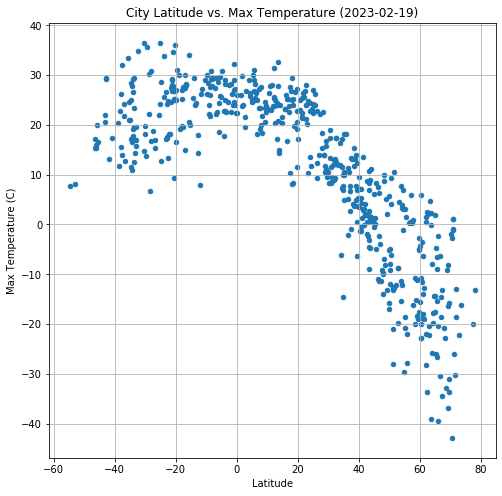

In [32]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(
    "Lat",
    "Max Temp",
    grid=True,
    figsize=(8,8),
    title="City Latitude vs. Max Temperature (2023-02-19)"
    )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

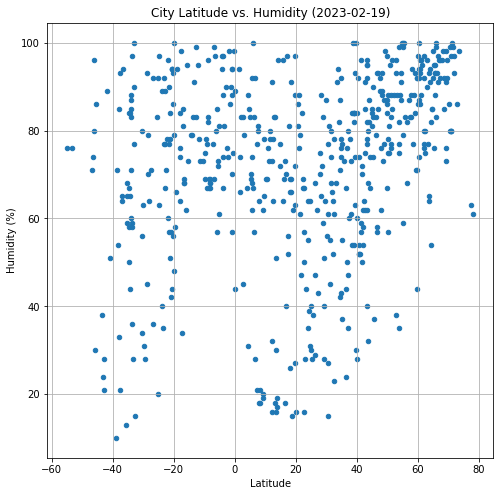

In [33]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(
    "Lat",
    "Humidity",
    grid=True,
    figsize=(8,8),
    title="City Latitude vs. Humidity (2023-02-19)"
    )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

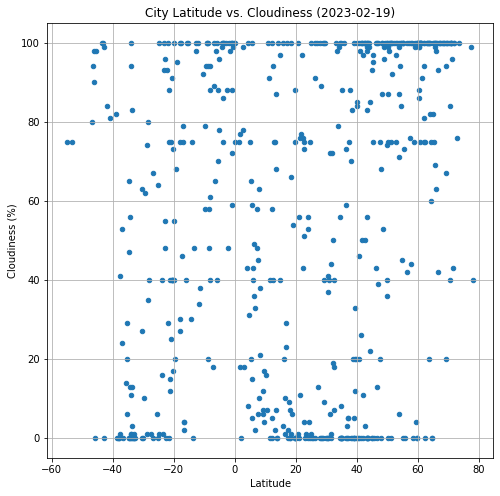

In [34]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(
    "Lat",
    "Cloudiness",
    grid=True,
    figsize=(8,8),
    title="City Latitude vs. Cloudiness (2023-02-19)"
    )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

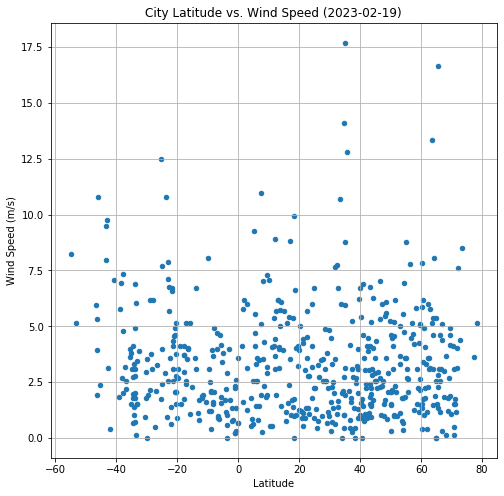

In [35]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(
    "Lat",
    "Wind Speed",
    grid=True,
    figsize=(8,8),
    title="City Latitude vs. Wind Speed (2023-02-19)"
    )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


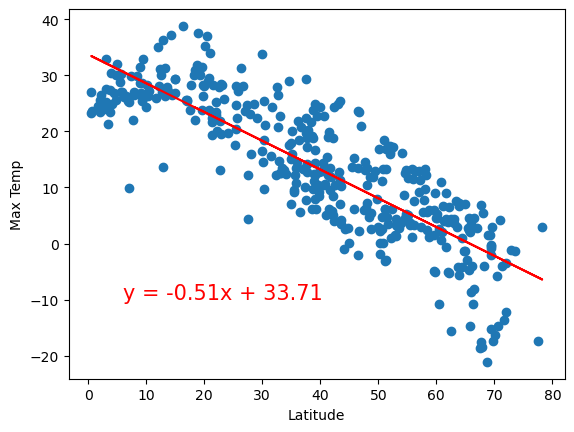

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


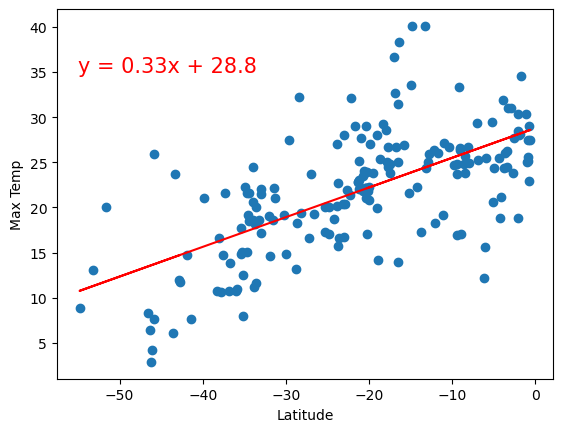

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


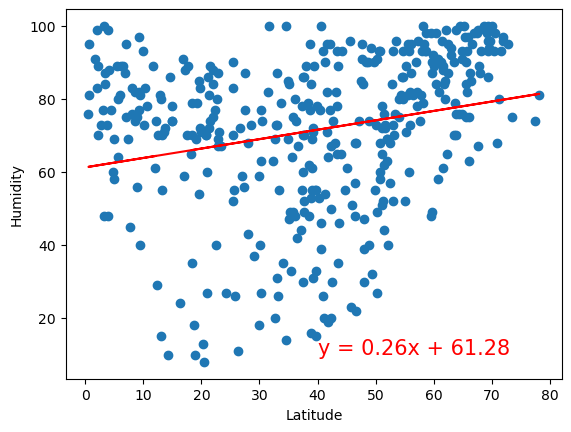

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


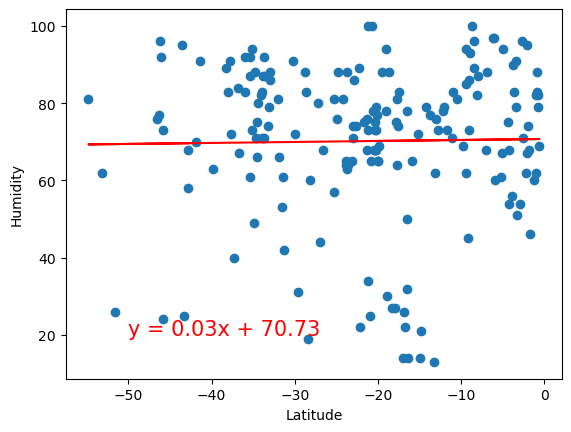

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


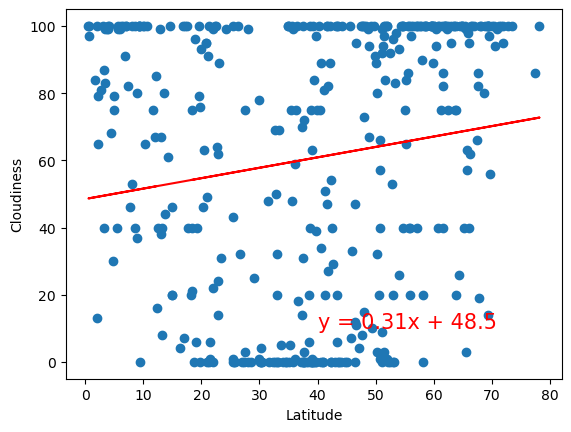

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


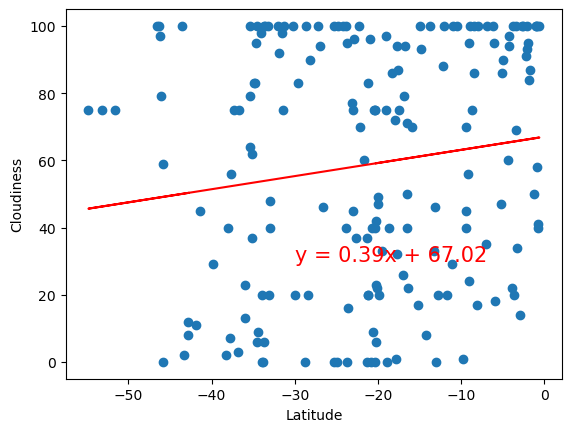

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


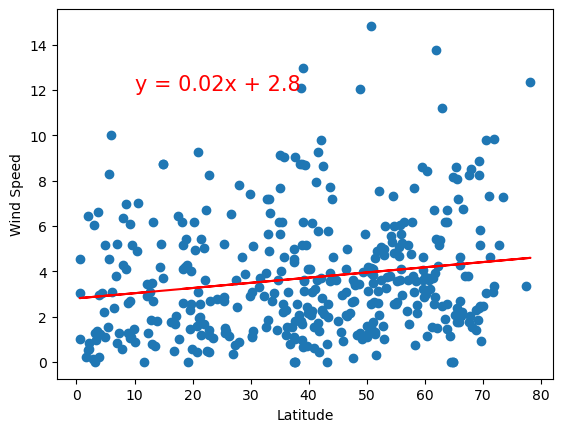

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


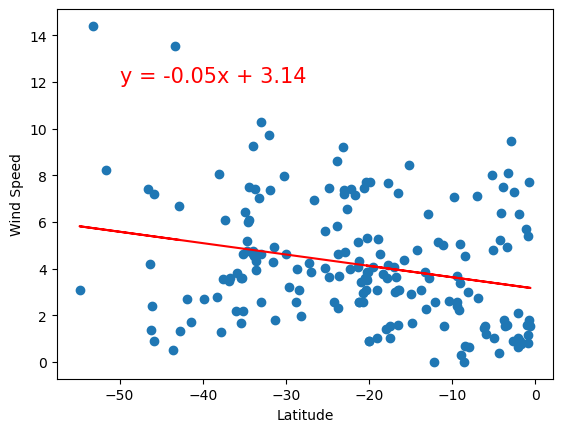

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE